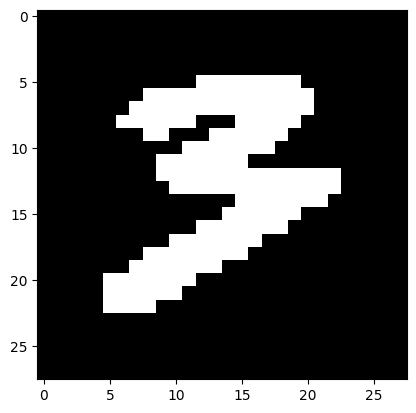

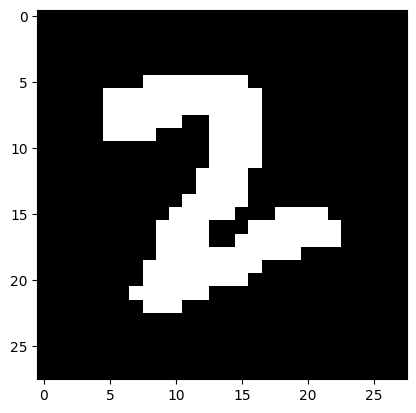

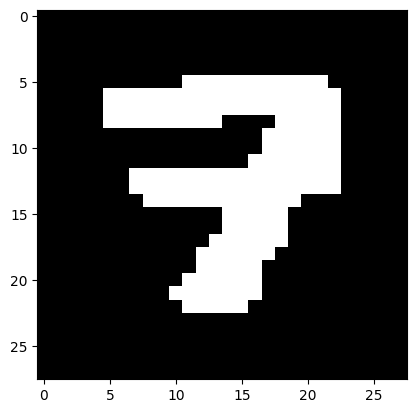




----------------Contoured Image--------------------


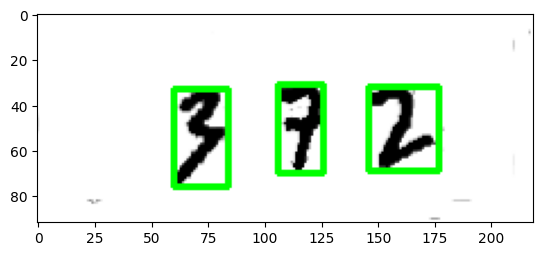

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('new_2.png')
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
grey = cv.GaussianBlur(grey,(5,5),0)
thresh = cv.adaptiveThreshold(grey,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,5)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv.boundingRect(c)    
    if w*h >= 200: 
        cv.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        digit = thresh[y:y+h, x:x+w]
        resized_digit = cv.resize(digit, (18,18))
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        padded_digit = np.where(padded_digit > 0,1,0)
        digit = padded_digit.reshape(28,28,1)
        plt.imshow(digit, cmap="gray")
        plt.show()
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()